In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Images splitted/train'
valid_path = '/content/drive/MyDrive/Images splitted/val'


In [6]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Images/*')

In [9]:
folders

['/content/drive/MyDrive/Images/Fake', '/content/drive/MyDrive/Images/Real']

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
len(folders)

2

In [11]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Images splitted/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 618 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Images splitted/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 207 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
20/20 [==============================] - 276s 14s/step - loss: 1.1718 - accuracy: 0.5971 - val_loss: 0.7381 - val_accuracy: 0.6763
Epoch 2/50
20/20 [==============================] - 11s 548ms/step - loss: 0.6349 - accuracy: 0.7314 - val_loss: 0.6101 - val_accuracy: 0.7295
Epoch 3/50
20/20 [==============================] - 11s 534ms/step - loss: 0.3698 - accuracy: 0.8236 - val_loss: 0.4997 - val_accuracy: 0.7585
Epoch 4/50
20/20 [==============================] - 11s 541ms/step - loss: 0.3223 - accuracy: 0.8285 - val_loss: 0.4298 - val_accuracy: 0.7729
Epoch 5/50
20/20 [==============================] - 10s 500ms/step - loss: 0.2947 - accuracy: 0.8592 - val_loss: 0.4002 - val_accuracy: 0.7923
Epoch 6/50
20/20 [==============================] - 11s 544ms/step - loss: 0.2890 - accuracy: 0.8770 - val_loss: 0.4240 - val_accuracy: 0.7923
Epoch 7/50
20/20 [==============================] - 11s 538ms/step - loss: 0.2697 - accuracy: 0.8770 - val_loss: 0.4138 - val_accuracy: 0.7874


In [17]:
# Evaluate the model on the test set
eval_result = model.evaluate(test_set, steps=len(test_set))

# Calculate the accuracy
total_accuracy = eval_result[1]  # Assuming the accuracy metric is the second one returned by evaluate()

print("Total Accuracy:", total_accuracy)

7/7 [==============================] - 1s 131ms/step - loss: 0.5732 - accuracy: 0.8213
Total Accuracy: 0.8212560415267944


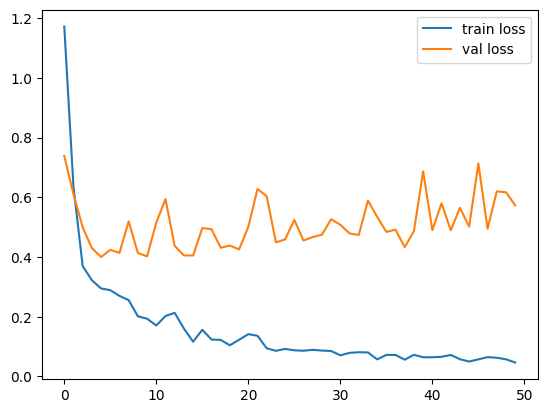

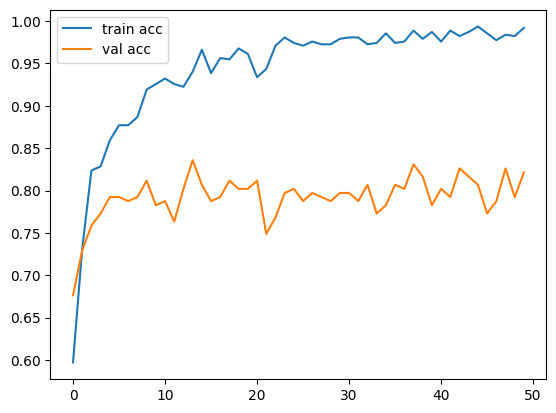

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model2_vgg16.h5')

In [22]:
y_pred = model.predict(test_set)
y_pred

7/7 [==============================] - 1s 117ms/step


array([[9.75725055e-01, 2.01830268e-02],
       [5.19975245e-01, 6.23255610e-01],
       [8.55758637e-02, 9.32950854e-01],
       [9.79964972e-01, 3.19998190e-02],
       [9.99560893e-01, 5.32870181e-04],
       [9.99614477e-01, 7.64443190e-04],
       [9.88995433e-01, 1.03113176e-02],
       [2.61822846e-02, 9.67492163e-01],
       [9.31021810e-01, 1.73532426e-01],
       [9.63944912e-01, 7.58176893e-02],
       [3.38636488e-01, 8.12530696e-01],
       [6.71518028e-01, 4.45683956e-01],
       [9.96830642e-01, 7.23221246e-03],
       [9.96246636e-01, 3.10895196e-03],
       [3.97918336e-02, 9.86137569e-01],
       [9.66323197e-01, 2.97999047e-02],
       [9.84761834e-01, 1.15643777e-02],
       [3.01715247e-02, 9.73767400e-01],
       [9.99067068e-01, 2.16458039e-03],
       [9.99372125e-01, 6.09824609e-04],
       [9.77235913e-01, 1.67464241e-02],
       [6.52897298e-01, 2.95138985e-01],
       [2.90669445e-02, 9.75329399e-01],
       [9.81681049e-01, 1.73630584e-02],
       [5.968447

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/model2_vgg16.h5')

In [34]:
img=image.load_img('/content/drive/MyDrive/Images/Fake/135.jpg',target_size=(224,224))
x=image.img_to_array(img)
x


array([[[255., 254., 255.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [255., 249., 253.],
        [255., 249., 253.],
        [255., 249., 253.]],

       [[255., 254., 255.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [255., 249., 253.],
        [255., 249., 253.],
        [255., 249., 253.]],

       [[255., 254., 255.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [255., 249., 253.],
        [255., 249., 253.],
        [255., 249., 253.]],

       ...,

       [[254., 251., 255.],
        [254., 251., 255.],
        [254., 251., 255.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[254., 251., 255.],
        [254., 251., 255.],
        [254., 251., 255.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[254., 251., 255.],
        [254., 251., 255.],
        [254., 2

In [35]:
x.shape


(224, 224, 3)

In [36]:
x=x/255

1/1 [==============================] - 0s 21ms/step
[[0.9833166  0.01821926]]
0.9833166 0.018219262


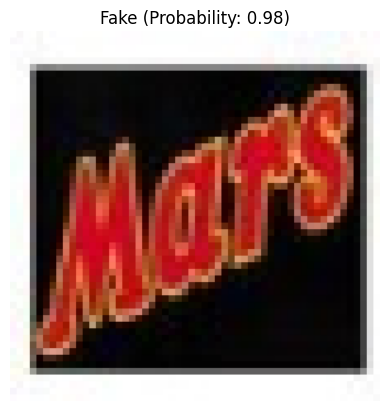

In [37]:
import matplotlib.pyplot as plt
x = x.reshape((-1, 224, 224, 3))
predictions = model.predict(x)

# Interpret the predictions
print(predictions)
print(predictions[0][0],predictions[0][1])
fake_probability = predictions[0][0]  # Assuming first index represents the probability of being fake


# Display the image with the prediction
plt.imshow(img)
if predictions[0][0] > predictions[0][1]:
    plt.title(f"Fake (Probability: {fake_probability:.2f})")
else:
    plt.title(f"Real (Probability: {1 - fake_probability:.2f})")
plt.axis('off')
plt.show()